<a href="https://colab.research.google.com/github/mateenali02/Code-Clause-Facial-Emotions-Detection/blob/main/model_CodeClause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Emotions Detection Internship Project
### by Mir Abdul Mateen Ali

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os

In [ ]:
!unzip '/content/drive/MyDrive/archive.zip' -d '/content/drive/MyDrive/Facial Emotion Recognition'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65242339.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65267116.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65275626.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_6529266.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65329617.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65338712.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65338797.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65387162.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Training_65404494.jpg  
  inflating: /content/drive/MyDrive/Facial Emotion Recognition/train/sad/Trai

In [ ]:
train_data_dir='/content/drive/MyDrive/Facial Emotion Recognition/train'
validation_data_dir='/content/drive/MyDrive/Facial Emotion Recognition/test'

In [ ]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [ ]:
train_path = "/content/drive/MyDrive/Facial Emotion Recognition/train"
test_path = "/content/drive/MyDrive/Facial Emotion Recognition/test"

In [ ]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [ ]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [ ]:
print(num_train_imgs)
print(num_test_imgs)
epochs=50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

model.save('/content/drive/MyDrive/Facial Emotion Recognition/model_file.h5')

28709
7178
Epoch 1/50
897/897 [==============================] - 96s 94ms/step - loss: 1.7750 - accuracy: 0.2654 - val_loss: 1.6862 - val_accuracy: 0.3138
Epoch 2/50
897/897 [==============================] - 70s 78ms/step - loss: 1.6773 - accuracy: 0.3234 - val_loss: 1.5036 - val_accuracy: 0.4104
Epoch 3/50
897/897 [==============================] - 70s 79ms/step - loss: 1.5284 - accuracy: 0.4027 - val_loss: 1.3518 - val_accuracy: 0.4859
Epoch 4/50
897/897 [==============================] - 71s 79ms/step - loss: 1.4258 - accuracy: 0.4466 - val_loss: 1.2874 - val_accuracy: 0.5045
Epoch 5/50
897/897 [==============================] - 70s 78ms/step - loss: 1.3672 - accuracy: 0.4779 - val_loss: 1.2464 - val_accuracy: 0.5209
Epoch 6/50
897/897 [==============================] - 70s 78ms/step - loss: 1.3294 - accuracy: 0.4885 - val_loss: 1.1965 - val_accuracy: 0.5474
Epoch 7/50
897/897 [==============================] - 69s 77ms/step - loss: 1.3059 - accuracy: 0.5019 - val_loss: 1.1795 - va

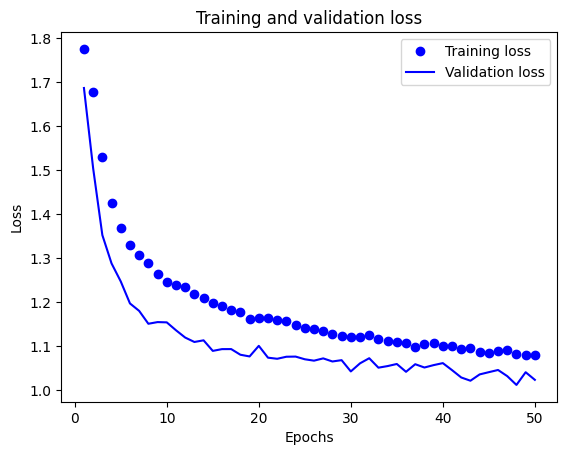

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

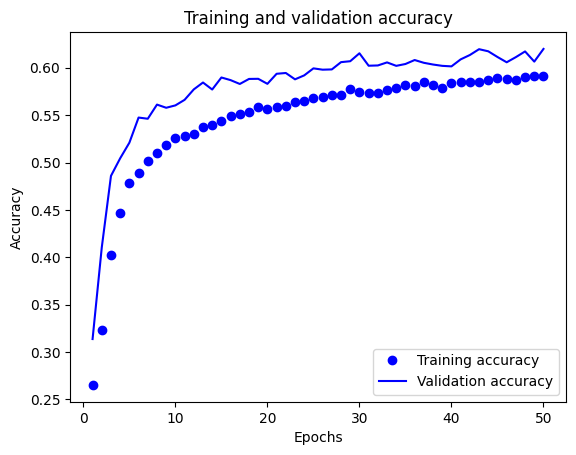

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

225/225 [==============================] - 11s 47ms/step


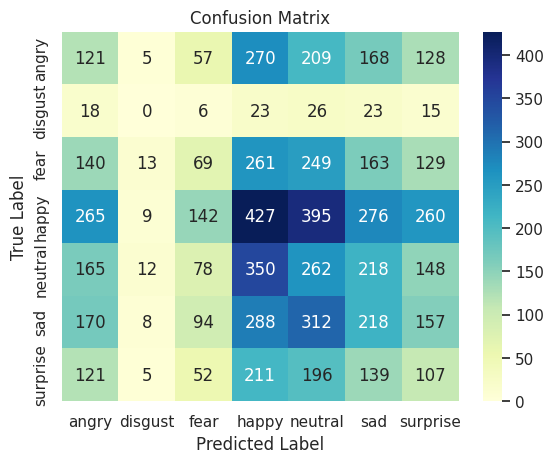

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()